In [1]:
from astropy import *
import astropy.units as u
import numpy as np
from astroquery.simbad import Simbad
import astropy.coordinates as coord

from astropy.io import ascii
from astropy.io import fits
import os.path
# 
import elk
from elk.ensemble import EnsembleLC
from elk.lightcurve import BasicLightcurve

from astropy.table import Table, join, MaskedColumn, vstack, Column
from matplotlib import pyplot as plt
import glob

In [2]:
path = '/uufs/astro.utah.edu/common/home/u1363702/notebooks/tess_clusters/TESS_Cluster_Age_ML'

In [3]:
path='/uufs/chpc.utah.edu/common/home/astro/zasowski/sinha/tess_data/light_curves/'

filenames =  glob.glob(path + 'all/*.fits')

l_of_cs=[]

fnames = []
nhdus = []

import time 

t0 = time.time()
print(len(filenames))
for file in filenames:
    hdul = fits.open(file)
    num_hdus = len(hdul) - 1
    hdul.close()

    fnames.append(file)
    nhdus.append(num_hdus)
t1 = time.time()
delta = t1 - t0
print('for all clusters, took {} seconds'.format(delta))
t1 = time.time()
delta = t1 - t0

348
for all clusters, took 1.8012909889221191 seconds


np.float64(8.74778238014597)

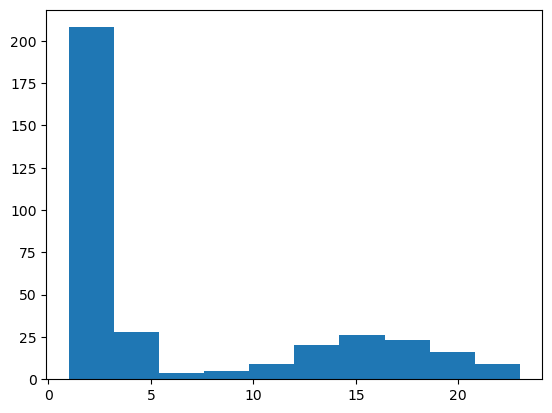

In [4]:
plt.hist(nhdus)
np.nanmedian(nhdus) + np.nanstd(nhdus)

In [5]:
from astropy.io import fits
import itertools

arr = np.arange(0,5)

combos = []
for i in arr:
    t = []
    for j in range(1,i+1):
        t.append(j)
    combos.append(t)
for i in arr[1:]:
    t = []
    for j in range(i,max(arr)+1):
        t.append(j)
    combos.append(t)
combos
combos = combos[1:-1]
combos

[[1], [1, 2], [1, 2, 3], [1, 2, 3, 4], [1, 2, 3, 4], [2, 3, 4], [3, 4]]

In [6]:
from itertools import combinations

list1 = np.arange(1,27)

all_combinations = []

for i in range(1,5):
    combos = list(combinations(list1,i))
    for j in combos:
        all_combinations.append(list(j))

In [7]:
# len(all_combinations)
all_combinations[-50]

[np.int64(19), np.int64(21), np.int64(23), np.int64(25)]

In [8]:


def get_combinations(num):

    arr = np.arange(1,num)

    all_combinations = []

    for i in range(1, 5):
        combos = list(combinations(arr,i))
        for j in combos:
            all_combinations.append(list(j))
    
    # arr = np.arange(1,num)
    
    # combos = []
    # for i in arr:
    #     t = []
    #     for j in range(1,i+1):
    #         t.append(j)
    #     combos.append(t)
    # for i in arr[1:]:
    #     t = []
    #     for j in range(i,max(arr)+1):
    #         t.append(j)
    #     combos.append(t)
    return all_combinations

combos = get_combinations(6)  

In [9]:
synth_data = []
for i in nhdus:
    synth_data.append(len(get_combinations(i)))
# len(synth_data)
sum(synth_data)

266645

In [10]:
cluster_files = []
for i in filenames:
    t = i.split('/uufs/chpc.utah.edu/common/home/astro/zasowski/sinha/tess_data/light_curves/all/')[1]
    t = t.split('.fits')[0]
    cluster_files.append(t)

with open('cluster_names.txt', 'w') as f:
    for line in cluster_files:
        f.write(f"{line}\n")
f.close()

In [11]:
resampled_fpath = '/uufs/chpc.utah.edu/common/home/astro/zasowski/sinha/tess_data/light_curves/resampled_fits_tables/'

In [12]:
def make_resampled_files(name):
    with fits.open('/uufs/chpc.utah.edu/common/home/astro/zasowski/sinha/tess_data/light_curves/all/' + name + '.fits') as hdul:
        num_hdus = len(hdul)
        count = 0
        # for i in range(1,num_hdus):
            # keep_hdus = [hdul[0]]
            # string = ''
            # keep_hdus.append(hdul[i])
            # string = string + str(i)
            # new_hdul = fits.HDUList(keep_hdus)
            # new_hdul[0].header['sectors'] = string
            # count +=1
        

            # fname = '{}_{}.fits'.format(name,count)
            # new_hdul.writeto(resampled_fpath + fname, overwrite=True)
            # print(count)
        
        combos = get_combinations(num_hdus)
        # combos = combos[1:-1]

        for combination in combos:
            keep_hdus = [hdul[0]]
            string = ''
            for idx,j in enumerate(combination):
                keep_hdus.append(hdul[j])
                string = string + str(j) + ','
            string = string[:-1]
            new_hdul = fits.HDUList(keep_hdus)
            new_hdul[0].header['sectors'] = string
            count +=1

            fname = '{}_{}.fits'.format(name,count)
            new_hdul.writeto(resampled_fpath + fname, overwrite=True)
            # print(count)
        hdul.close()
        print('Done: ' + name)

In [13]:
import time

In [14]:
count = 0
t0 = time.time()
for i in cluster_files[279:]:
    make_resampled_files(i)
    t1 = time.time()
    dt = np.round((t1-t0)/60,1)
    count +=1
    
    print('Time elapsed: {} minutes; Done {}/{} clusters'.format(dt, count, len(cluster_files)))

Done: hlsp_elk_tess_ffi_sl63-398_tess_v1_llc
Time elapsed: 0.4 minutes; Done 1/348 clusters
Done: hlsp_elk_tess_ffi_kmhk-147_tess_v1_llc
Time elapsed: 2.5 minutes; Done 2/348 clusters
Done: hlsp_elk_tess_ffi_berkeley-84_tess_v1_llc
Time elapsed: 2.5 minutes; Done 3/348 clusters
Done: hlsp_elk_tess_ffi_ngc-2002_tess_v1_llc
Time elapsed: 3.7 minutes; Done 4/348 clusters
Done: hlsp_elk_tess_ffi_ngc-269_tess_v1_llc
Time elapsed: 3.7 minutes; Done 5/348 clusters
Done: hlsp_elk_tess_ffi_berkeley-49_tess_v1_llc
Time elapsed: 3.7 minutes; Done 6/348 clusters
Done: hlsp_elk_tess_ffi_king-10_tess_v1_llc
Time elapsed: 3.7 minutes; Done 7/348 clusters
Done: hlsp_elk_tess_ffi_ngc-2156_tess_v1_llc
Time elapsed: 4.3 minutes; Done 8/348 clusters
Done: hlsp_elk_tess_ffi_ngc-416_tess_v1_llc
Time elapsed: 4.3 minutes; Done 9/348 clusters
Done: hlsp_elk_tess_ffi_lynga-3_tess_v1_llc
Time elapsed: 4.3 minutes; Done 10/348 clusters
Done: hlsp_elk_tess_ffi_ngc-1839_tess_v1_llc
Time elapsed: 5.4 minutes; Done 

In [ ]:
resampled_fpath = 'light_curves/resampled_fits_tables/'

with fits.open('light_curves/MW/hlsp_elk_tess_ffi_ascc-116_tess_v1_llc.fits') as hdul:
    num_hdus = len(hdul)
    count = 0
    for i in range(1,num_hdus):
        keep_hdus = [hdul[0]]
        string = ''
        keep_hdus.append(hdul[i])
        string = string + str(i)
        new_hdul = fits.HDUList(keep_hdus)
        new_hdul[0].header['sectors'] = string
        count +=1
        

        fname = 'ascc_116_{}.fits'.format(count)
        new_hdul.writeto(resampled_fpath + fname, overwrite=True)
        print(count)

    print('Done Individuals!')
        
    combos = get_combinations(num_hdus)
    combos = combos[1:-1]

    for combination in combos:
        keep_hdus = [hdul[0]]
        string = ''
        for idx,j in enumerate(combination):
            keep_hdus.append(hdul[j])
            string = string + str(j) + ','
        string = string[:-1]
        new_hdul = fits.HDUList(keep_hdus)
        new_hdul[0].header['sectors'] = string
        count +=1

        fname = 'ascc_116_{}.fits'.format(count)
        new_hdul.writeto(resampled_fpath + fname, overwrite=True)
        print(count)
    hdul.close()

    

In [ ]:
combos

In [ ]:
x = np.arange(1,5)

for i in range(1,len(x)+1):
    y = np.arange(1,5)
    for j in range(1,len(y)+1):
        print(i,j)

In [ ]:
23*22*21*20